In [1]:
"""
make a NN that can predict the next frame for a sine function
source:https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

model-1:  fully connected nn with 1 hidden layer, batches = 10, D_in = 50, H = 200, D_out = 50
model-2: ConvNet with fully connected network
"""

'\nmake a NN that can predict the next frame for a sine function\n'

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import torch

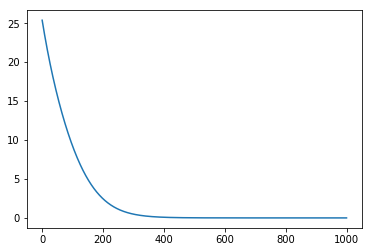

In [59]:
data = []
for t in range(1000):
    a = np.sin(np.linspace(0,10))
#     plt.plot([i for i in range(len(a))],a,label=f'at time={t}')
    data.append(a)
#     print(a)

data = np.array(data) #(1000,50)
# print(data.shape)  
# plt.legend(loc='upper right')
# plt.show()

x = torch.Tensor(data,device='cuda')
b = np.sin(np.linspace(0,10))
y = torch.Tensor(b,device='cuda')

# print(x)
# print()
# print(y)
# print()

model = torch.nn.Sequential(
    torch.nn.Linear(50,200),
    torch.nn.ReLU(),
    torch.nn.Linear(200, 50),
)

# print(model)

loss_fn = torch.nn.MSELoss(reduction='sum')
learning_rate = 1e-4

loss_list = []

for t in range(1000):
    y_pred = model(x[t])
    loss = loss_fn(y_pred, y)
    loss_list.append(loss.item())
#     print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

            
            
plt.plot([i for i in range(len(loss_list))],loss_list)



In [64]:
import torch.nn as nn
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(50, 25, kernel_size=5, stride=1, padding=2),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv1d(25, 30, kernel_size=5, stride=1, padding=2),
            nn.ReLU())
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 30, 1000)
        self.fc2 = nn.Linear(1000, 50)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out


model2 = ConvNet()
print(model2)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

ConvNet(
  (layer1): Sequential(
    (0): Conv1d(50, 25, kernel_size=(5,), stride=(1,), padding=(2,))
    (1): ReLU()
  )
  (layer2): Sequential(
    (0): Conv1d(25, 30, kernel_size=(5,), stride=(1,), padding=(2,))
    (1): ReLU()
  )
  (drop_out): Dropout(p=0.5)
  (fc1): Linear(in_features=1470, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=50, bias=True)
)
